# Exercise 4 : Linear Regression
### Problems
### Problem 1 : Predicting SalePrice using GrLivArea
#### Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71.
#### In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.
#### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.
##### b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
#### Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.
#### Hints and Pointers
#### o If you take just the first 80% of the data as train and the next 20% as test, it may not be the best train test split.
#### o If you obtain the coefficients for the regression line (intercept and coef), it should be easy to plot the line too.
#### o Goodness of Fit on train depends on the variance you explain, while prediction accuracy depends on the errors

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [41]:
housedata = pd.read_csv('train.csv')
housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Hypothetical Model: SalePrice = a x GrLivArea + b

In [3]:
# create dataframe for SalePrice ad GrLivArea
SalePrice = pd.DataFrame(housedata['SalePrice'])
GrLivArea = pd.DataFrame(housedata['GrLivArea'])

In [4]:
# Regression with random train-test split
# import sklearn models and functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Intercept of Regression 	: b =  [24956.88743337]
Coefficients of Regression 	: a =  [[102.84202818]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49085195699959994
Mean Squared Error (MSE) 	: 3145892077.316398

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5300632441741397
Mean Squared Error (MSE) 	: 3142043786.2498302



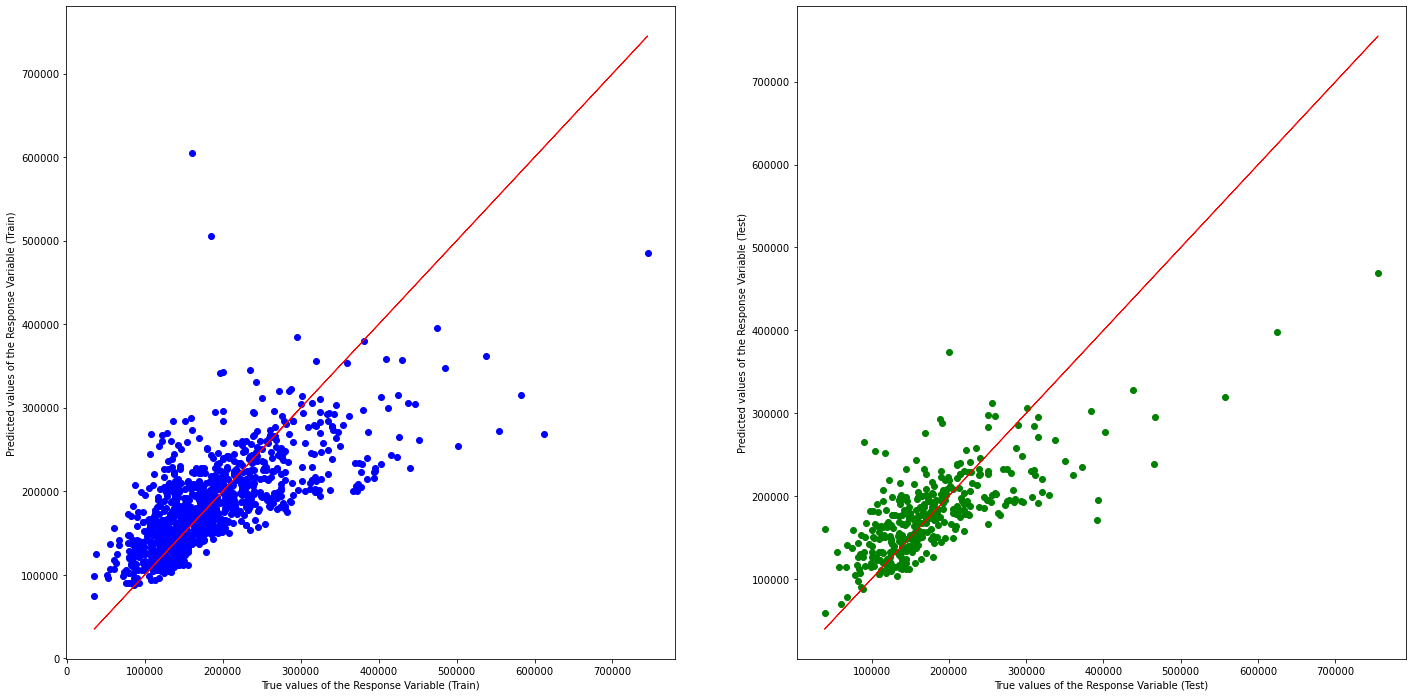

In [62]:
# Split the Dataset into Train and Test
X1_train, X1_test, y1_train, y1_test = train_test_split(GrLivArea, SalePrice, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X1_train, y1_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X1_train)
y_test_pred = linreg.predict(X1_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X1_train, y1_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X1_test, y1_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y1_train, y_train_pred, color = "blue")
axes[0].plot(y1_train, y1_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y1_test, y_test_pred, color = "green")
axes[1].plot(y1_test, y1_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [29]:
TotalBsmtSF = pd.DataFrame(housedata['TotalBsmtSF'])
GarageArea = pd.DataFrame(housedata['GarageArea'])

Intercept of Regression 	: c =  [57667.47383248]
Coefficients of Regression 	: d =  [[116.65822529]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3909714385880323
Mean Squared Error (MSE) 	: 3736176141.4579864

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.33298494663991685
Mean Squared Error (MSE) 	: 4544807912.136947



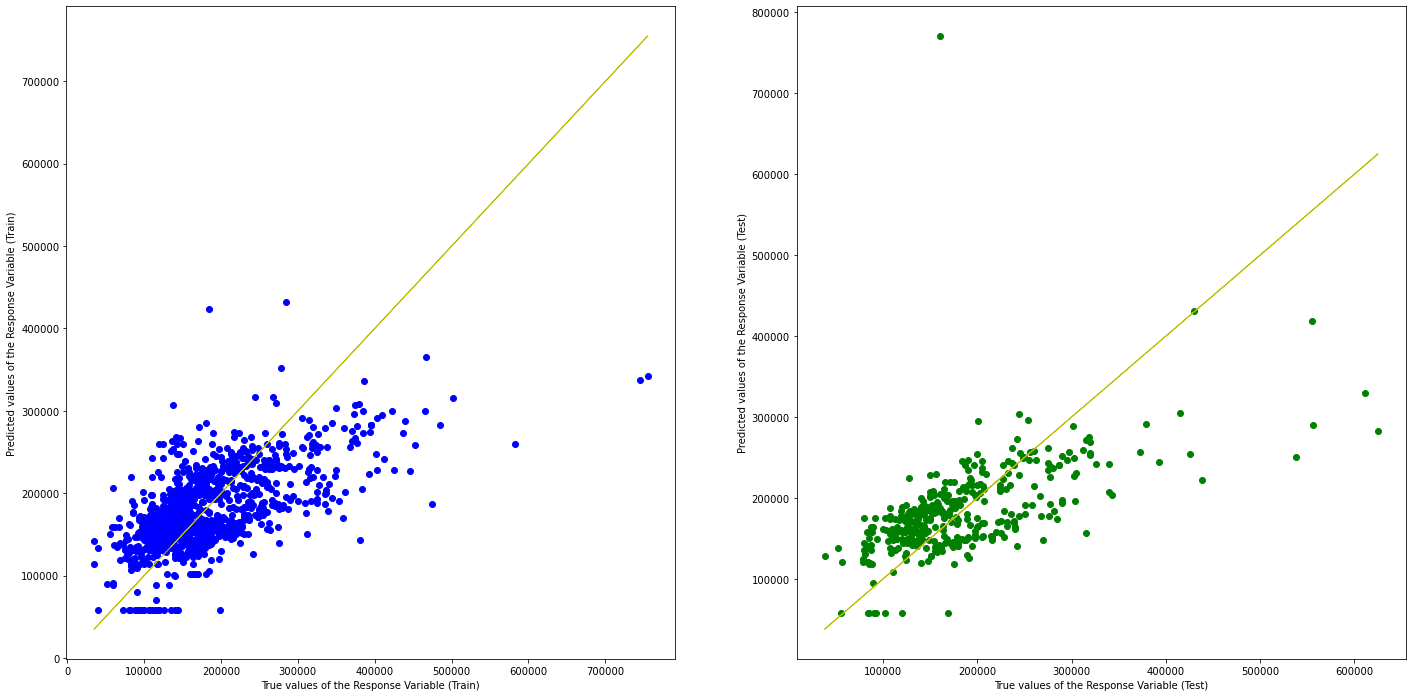

In [31]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(TotalBsmtSF, SalePrice, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: c = ', linreg.intercept_)
print('Coefficients of Regression \t: d = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'y-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'y-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [65702.7481001]
Coefficients of Regression 	: a =  [[244.92208816]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4170955024523668
Mean Squared Error (MSE) 	: 3910665114.974306

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.26111700426501483
Mean Squared Error (MSE) 	: 3723972296.071556



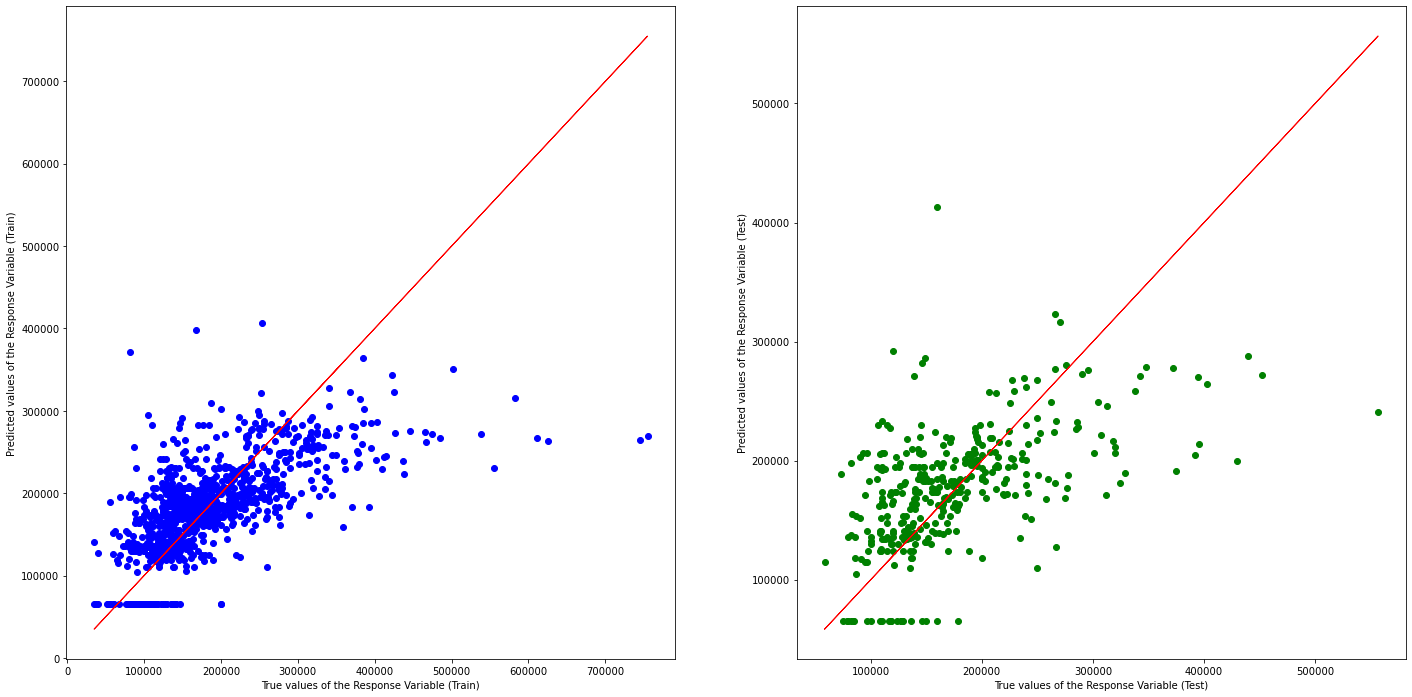

In [32]:
# Split the Dataset into Train and Test
X1_train, X1_test, y1_train, y1_test = train_test_split(GarageArea, SalePrice, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X1_train, y1_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X1_train)
y_test_pred = linreg.predict(X1_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X1_train, y1_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X1_test, y1_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y1_train, y_train_pred, color = "blue")
axes[0].plot(y1_train, y1_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y1_test, y_test_pred, color = "green")
axes[1].plot(y1_test, y1_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [63]:
jointDF = pd.concat([SalePrice, GrLivArea], axis = 1).reindex(GrLivArea.index)

# Outlier is any data points outside the inner lower/higher fence
# calculated by 1 Step above 75th percentile and 1 Step below 25th percentile
# Step = 1.5 * IQR 

Q1 = jointDF.quantile(0.25) 
Q3 = jointDF.quantile(0.75)

IQR = Q3 - Q1

clean_df= jointDF[~((jointDF < (Q1 - 1.5 * IQR)) |(jointDF > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_df.describe()

clean_df

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


In [65]:
clean_SalePrice = pd.DataFrame(clean_df['SalePrice'])
clean_GrLivArea = pd.DataFrame(clean_df['GrLivArea'])
clean_SalePrice

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


Intercept of Regression 	: b =  [28894.87444883]
Coefficients of Regression 	: a =  [[97.24492759]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4880421497403047
Mean Squared Error (MSE) 	: 1835664369.7474723

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4338587910908216
Mean Squared Error (MSE) 	: 1705916259.2248387



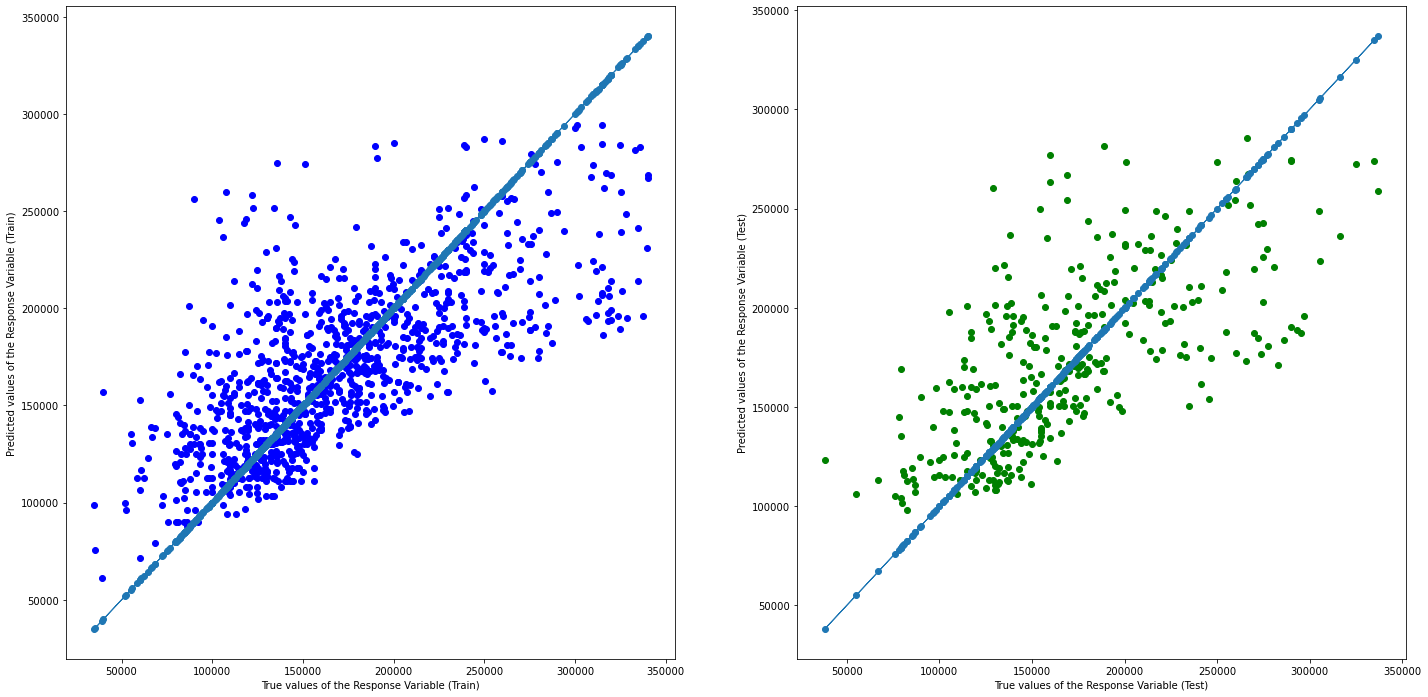

In [69]:
# Split the Dataset into Train and Test
X1_train, X1_test, y1_train, y1_test = train_test_split(clean_GrLivArea, clean_SalePrice, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X1_train, y1_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X1_train)
y_test_pred = linreg.predict(X1_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X1_train, y1_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X1_test, y1_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y1_train, y_train_pred, color = "blue")
axes[0].plot(y1_train, y1_train, 'o-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y1_test, y_test_pred, color = "green")
axes[1].plot(y1_test, y1_test, 'o-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

This model is slightly worse than the previous model, since the R^2 value is slightly smaller than the previous model.